In [1]:
!pip install kaggle

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [kaggle]━━━━ 4/5 [kaggle]


In [3]:
!ls ~/DeepLearning


hocSau.ipynb  plant-pathology-2020-fgvc7.zip


In [4]:
import zipfile
import os

zip_path = os.path.expanduser("~/DeepLearning/plant-pathology-2020-fgvc7.zip")
extract_path = os.path.expanduser("~/DeepLearning/plant_pathology_2020")

# Tạo thư mục lưu trữ sau khi giải nén
os.makedirs(extract_path, exist_ok=True)

# Giải nén
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [5]:
print(os.listdir(extract_path))

['images', 'test.csv', 'sample_submission.csv', 'train.csv']


In [2]:
import pandas as pd
import os

train_csv = os.path.expanduser("~/DeepLearning/plant_pathology_2020/train.csv")
train_df = pd.read_csv(train_csv)

print("Số lượng mẫu:", len(train_df))
print(train_df.head())

Số lượng mẫu: 1821
  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0


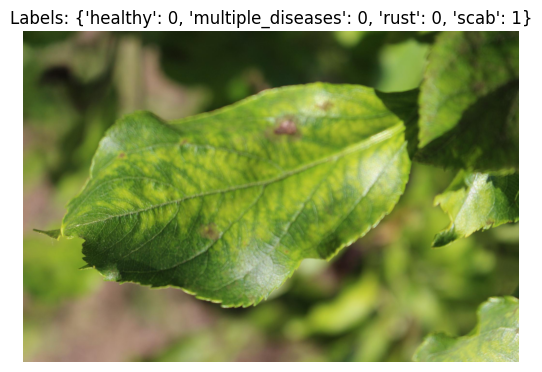

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = os.path.expanduser("~/DeepLearning/plant_pathology_2020/images")

sample = train_df.iloc[0]   # lấy 1 ảnh đầu tiên
img_path = os.path.join(image_folder, sample["image_id"] + ".jpg")

img = mpimg.imread(img_path)
plt.imshow(img)
plt.title(f"Labels: {sample[1:].to_dict()}")
plt.axis("off")
plt.show()


In [6]:
!pip install scikit-image

  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.5.10-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 8.1 MB/s eta 0:00:008.1 MB/s eta 0:00:01
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2025.5.10-py3-none-any.whl (226 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-image]0m 3/4 [scikit-image]


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from skimage.io import imread
from skimage.transform import resize

data_path = os.path.expanduser("~/DeepLearning/datasets/plant_pathology_2020")
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))

X = []
y = []

for idx, row in train_df.iterrows():
    img_path = os.path.join(data_path, "images", row["image_id"] + ".jpg")
    img = imread(img_path)
    img_resized = resize(img, (64, 64)).flatten()   # resize & flatten
    X.append(img_resized)
    # Lấy nhãn
    label = row[1:].idxmax()  # cột có giá trị 1
    y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

In [ ]:
# ---- Giảm chiều bằng PCA ----
pca = PCA(n_components=100)  # giảm xuống 100 chiều
X_pca = pca.fit_transform(X)

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# ---- Logistic Regression ----
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

In [ ]:
# ---- Random Forest ----
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred))

In [5]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined